_Neural Data Science_

Lecturer: Jan Lause, Prof. Dr. Philipp Berens

Tutors: Jonas Beck, Rita González Márquez, Fabio Seel

Summer term 2024

Student names: <span style='background: yellow'>*Lalitha Sivakumar, Madhavi Sen, Kübra Özdemir * </span>

# Coding Lab 1

- __Data__: Download the data file ```nds_cl_1.csv``` from ILIAS and save it in a subfolder ```../data/```.
- __Dependencies__: You don't have to use the exact versions of all the dependencies in this notebook, as long as they are new enough. But if you run "Run All" in Jupyter and the boilerplate code breaks, you probably need to upgrade them.


Recommended folder structure:

```
.
├── data/
│   └── nds_cl_1.csv
├── notebooks
│   └── CodingLab1.ipynb
├── matplotlib_style.txt
└── requirements.txt
```

In [1]:
!pip install jupyter_black
!pip install watermark


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal  # signal processing
from sklearn.decomposition import PCA
from __future__ import annotations  # for Python 3.8 and below

# black is a code formatter (see https://github.com/psf/black).
# It will automatically format the code you write in the cells imposing consistent Python style.
%load_ext jupyter_black

%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark -p sklearn

Last updated: 2024-04-28 11:06:10W. Europe Daylight Time

Python implementation: CPython
Python version       : 3.10.8
IPython version      : 8.4.0

sklearn: 1.1.1

pandas    : 1.4.3
numpy     : 1.23.0
matplotlib: 3.5.2
scipy     : 1.8.1

Watermark: 2.4.3



In [3]:
# matplotlib style file
# Template for style file: https://matplotlib.org/stable/tutorials/introductory/customizing.html#customizing-with-style-sheets
plt.style.use(r"C:/Users/Lalitha Sivakumar/Downloads/CL1/matplotlib_style.txt")

## Load data

In [4]:
fs = 30000.0  # sampling rate of the signal in Hz
dt = 1 / fs
cols = ["Ch1", "Ch2", "Ch3", "Ch4"]
x = pd.read_csv(
    r"C:/Users/Lalitha Sivakumar/Downloads/CL1/data/nds_cl_1.csv", header=0, names=cols
)

In [5]:
x.describe()

,Ch1,Ch2,Ch3,Ch4
count,1.920000e+07,1.920000e+07,1.920000e+07,1.920000e+07
mean,3.600331e+00,-8.850918e-01,2.864284e-01,2.210982e+00
std,5.824474e+02,6.014818e+02,6.464363e+02,6.126105e+02
min,-3.607000e+03,-3.739000e+03,-3.871000e+03,-3.750000e+03
25%,-3.460000e+02,-3.610000e+02,-3.950000e+02,-3.640000e+02
50%,1.200000e+01,8.000000e+00,-1.000000e+00,1.000000e+01
75%,3.650000e+02,3.720000e+02,4.010000e+02,3.810000e+02
max,2.873000e+03,3.004000e+03,3.099000e+03,3.017000e+03


## Task 1: Filter Signal

In order to detect action potentials, the first step is to filter out low frequency fluctuations (LFP) and high frequency noise. Determine appropriate filter settings and implement the filtering in the function ```filter_signal()```. A typical choice for this task would be a <mark>butterworth filter</mark>. Plot a segment of the raw signal and the filtered signal for all four channels with matching y-axis. The segment you choose should contain spikes. When you apply the function also test different filter settings.

*Grading: 2 pts*


In [6]:
from scipy.signal import butter, filtfilt  # for butterworth filter


def filter_signal(
    x: pd.DataFrame, fs: float, low: float, high: float, order: int = 3
) -> pd.DataFrame:
    """Filter raw signal x.

    Parameters
    ----------

    x: pd.DataFrame, (n_samples, n_channels)
        Each column in x is one recording channel.

    fs: float
        Sampling frequency.

    low, high: float, float
        Passband in Hz for the butterworth filter.

    order: int
        The order of the Butterworth filter. Default is 3, but you should try
        changing this and see how it affects the results.


    Returns
    -------

    y: pd.DataFrame, (n_samples, n_channels)
        The filtered x. The filter delay is compensated in the output y.


    Notes
    ----

    1. Try exploring different filters and filter settings. More info:
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

    2. The output signal should be phase-shift compensated. More info:
    https://dsp.stackexchange.com/a/19086

    """

    # insert your code here
    y = pd.DataFrame(index=x.index, columns=x.columns)  # fn return stores filtered x

    low_freq = low / fs  # normalize cutoff frequencies for stability (Nquist criteria)
    high_freq = high / fs

    # --------------------------------------------------------------------
    # implement a suitable filter and apply it to the input data (1.5 pts)
    for col in x.columns:
        signal = x[col].values  # extract raw signal

        # apply butterworth filter for ch1-4
        b, a = butter(order, [low_freq, high_freq], btype="band")
        filtered_signal = filtfilt(
            b, a, signal
        )  # filtfilt compensates for phase shifts
        y[col] = filtered_signal

    return y
    # --------------------------------------------------------------------

    pass

In [7]:
xf = filter_signal(x, fs, 500, 4000)

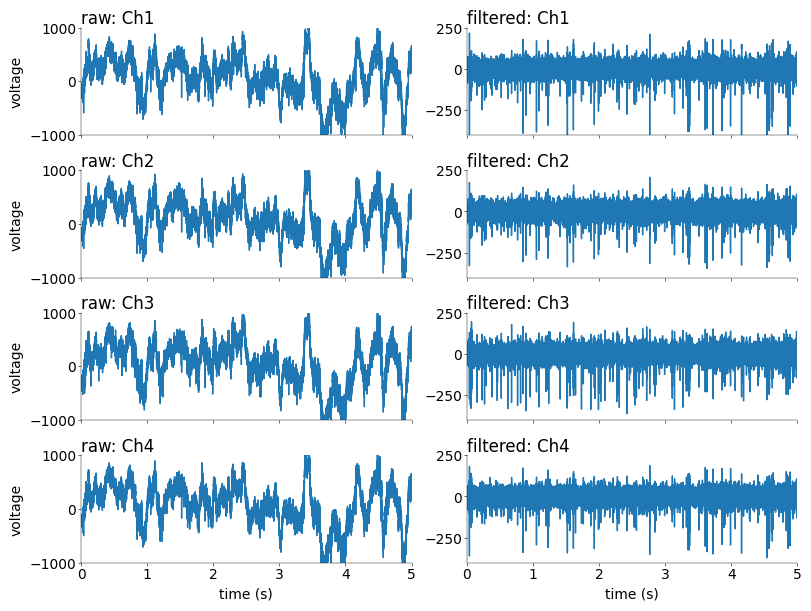

In [8]:
mosaic = [
    ["raw: Ch1", "filtered: Ch1"],
    ["raw: Ch2", "filtered: Ch2"],
    ["raw: Ch3", "filtered: Ch3"],
    ["raw: Ch4", "filtered: Ch4"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 6), layout="constrained", dpi=100
)

# -----------------------------------------------------------------
# Plot raw and filtered signal segments for all 4 channels (0.5 pt)
# here, x axis is time and not Hz
for i, m in enumerate(mosaic):
    raw = m[0]
    filtered = m[1]
    ax[raw].plot(x.index / fs, x[cols[i]])
    ax[raw].set_xlim((0, 5))  # 5 second window captures the spikes efficiently
    ax[raw].set_ylim((-1000, 1000))

    ax[filtered].plot(x.index / fs, xf[cols[i]])
    ax[filtered].set_xlim((0, 5))
    ax[filtered].set_ylim((-400, 250))

    ax[raw].set_ylabel("voltage")
    ax[filtered].set_title(m[1], loc="left")

    ax[raw].set_title(m[0], loc="left")

    if i != 3:
        ax[raw].set_xticklabels([])
        ax[filtered].set_xticklabels([])
    else:
        ax[raw].set_xlabel("time (s)")
        ax[filtered].set_xlabel("time (s)")

# -----------------------------------------------------------------

## Task 2: Detect action potentials

Action potentials are usually detected by finding large-amplitude deflections in the continuous signal. A good choice of threshold for detecting spikes is important. If it is too low, you will detect too many low amplitude events (noise); if it is too high, you run the risk of missing good spikes. Implement an automatic procedure to obtain a reasonable threshold and detect the times when spikes occurred in the function ```detect_spikes()``` . Plot a segment of the filtered signal for all four channels with matching y-axis and indicate the time points where you detected spikes. **Plot the threshold**. Are the detected time points well aligned with peaks in the signal?

*Grading: 3 pts*

In [15]:
# from scipy.signal import argrelmin
def detect_spikes(
    x: np.ndarray, fs: float, N: int = 5, lockout: int = 10
) -> tuple[np.ndarray, np.ndarray, np.float64]:
    """Detect spikes using a logical approach.

    Parameters
    ----------
    x: np.array (n_samples, n_channels)
        The filtered signal.

    fs: float
        The sampling rate (in Hz).

    N: int
        Multiplier for the standard deviation to set the threshold.

    lockout: int
        Refractory period within which only one spike is allowed.

    Returns
    -------
    s: np.array
        Spike indices in the signal x.

    t: np.array
        Spike times in milliseconds.

    thrd: float
        Threshold value.

    """
    # insert your code here

    # -----------------------------------------------------------------------
    # compute the robust s.d. (0.5 pts) and calculate the threshold (0.5 pts)
    sigma = np.median(np.abs(x - x.mean()) / 0.6745)
    thrd = -N * sigma
    # -----------------------------------------------------------------------

    # -------------------------------
    # find all local minima (1.5 pts)
    # potential_spike = argrelmin(x, axis=0, order=lockout)[0]
    s0 = []  #empty list to store peaks
    for ft in x.columns:
        # peaks are classified as spikes by inverting the signals
        s1, _ = signal.find_peaks(-x[ft], height=-thrd, distance=lockout)
        s0.extend(s1)
        s0 = np.unique(s0) #consider only unique spike (a spike is classified as one if it is on atleast one channel)
        
    s2 = [] #empty list to store spike indices to return
    last = -lockout - 1  #clear those spike detections within the lockout period that have differing timepoints
    for d in s0:
        if d - last > lockout:
            s2.append(d)
            last = d
    s2 = np.asarray(s2)

    t = s2 / fs  #spike time to return

    return s2, t, thrd
    # -------------------------------

    pass

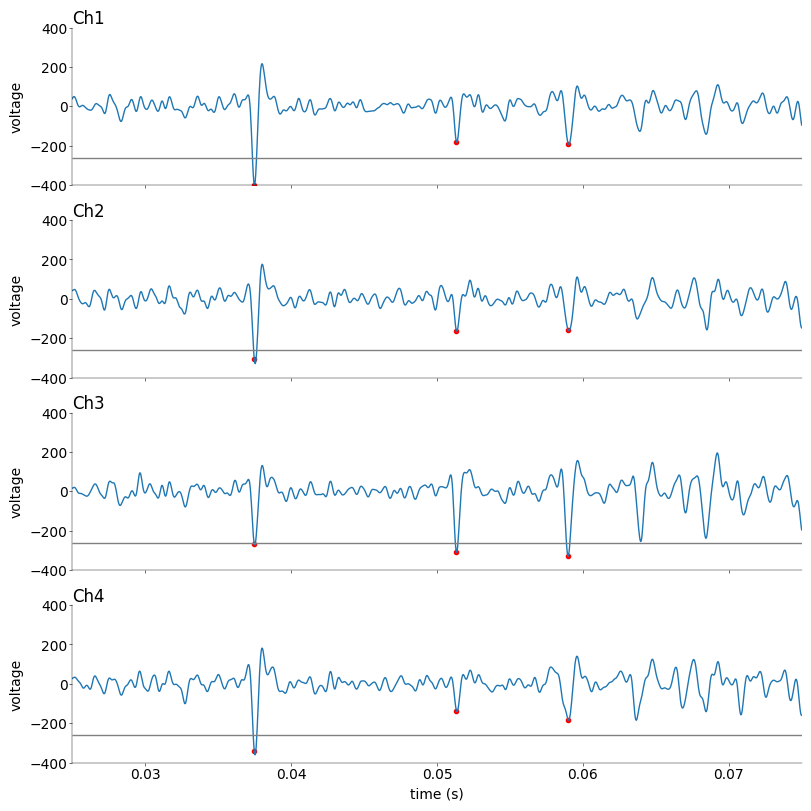

In [36]:
mosaic = [
    ["Ch1"],
    ["Ch2"],
    ["Ch3"],
    ["Ch4"],
]

fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 8), layout="constrained", dpi=100
)

# --------------------------------------------
# plot threshold and detected spikes (0.5 pts)
# --------------------------------------------

s, t, thrd = detect_spikes(xf, fs, N=8, lockout=10)
t_start = 0.025  #for linspace in sec
t_end = 0.075  

#filter only the spikes to be plotted within the specified time window
t_spikes = [x for x in t if t_start <= x < t_end]
i_spikes = [x for x in s if t_start * fs <= x < t_end * fs]

for i, col in enumerate(cols):
    ax[col].set_ylim((-400, 400))
    ax[col].set_xlim((0.025, 0.075))
    ax[col].set_ylabel("voltage")

    ax[col].set_title(col, loc="left")

    if col != "Ch4":
        ax[col].set_xticklabels([])
    else:
        ax[col].set_xlabel("time (s)")


    X_start = int(t_start * fs)
    X_end = int(t_end * fs)
    ax[col].plot(
        np.linspace(t_start, t_end, X_end - X_start), xf.iloc[X_start:X_end, i]
    )
    ax[col].hlines(thrd, t_start, t_end, colors="grey")  # Threshold line
    ax[col].scatter(t_spikes, xf.iloc[i_spikes, i], c="red")  # Spike markings

## Task 3: Extract waveforms
For later spike sorting we need the waveforms of all detected spikes. Extract the waveforms segments (1 ms) on all four channels for each spike time (as a result each spike is represented by a 4x30 element matrix). Implement this procedure in the function ```extract_waveforms()```. Plot (a) the first 100 spikes you detected and (b) the 100 largest spikes you detected. Are there a lot of very small spikes (likely noise) among your detected spikes? If so your threshold may be too low. Can you see obvious artifacts, not looking like spikes at all?

*Grading: 2 pts*

In [41]:
def extract_waveforms(x: np.ndarray, s: np.ndarray) -> np.ndarray:
    """Extract spike waveforms at times s (given in samples)
    from the filtered signal `xf` using a fixed window around the
    times othrdf the spikes.

    Parameters
    ----------

    x: np.array (n_samples, n_channels)
        The filtered signal.

    s: np.array, (n_spikes, n_channels)
        Spike time in samples.


    Return
    ------

    w: np.array, (n_spikes, length_window, n_channels)
        Waveforms. (You don't have to get the exact same
        shape as we noted here. It's just the shape of w
        that can be easily retrieved via broadcasting.)


    Notes
    -----

    More on Numpy Broadcasting
    https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html

    """

    # insert your code here

    # ------------------------------
    # extract spike waveforms (1 pt)
    # ------------------------------
    win = 10

    w = []
    for spike in s:
        # 10 Hz before the peak of the spike and 20 Hz after
        window = x[spike - win : spike + win * 2, :]
        w.append(window)

    w = np.asarray(w)

    return w

Plot first 100 spike waveforms

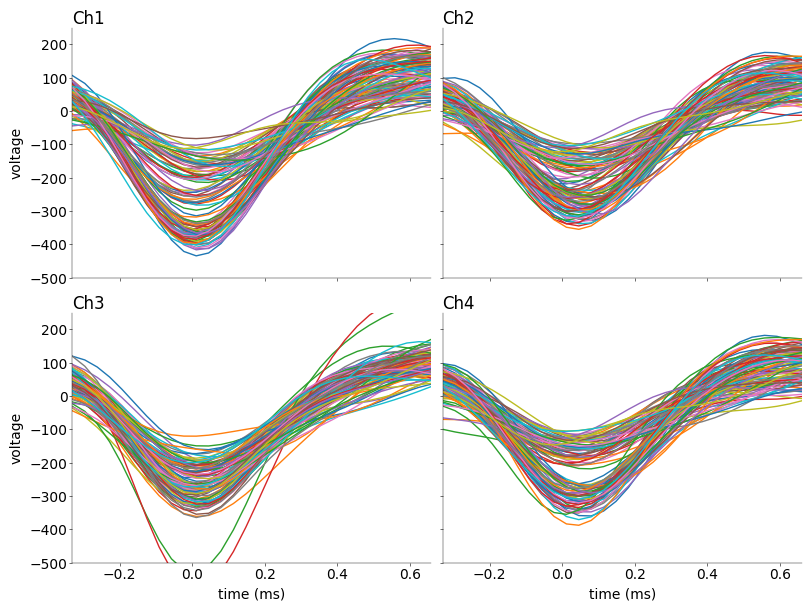

In [42]:
mosaic = [
    ["Ch1", "Ch2"],
    ["Ch3", "Ch4"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 6), layout="constrained", dpi=100
)

# -------------------------------
# plot first 100 spikes (0.5 pts)
# -------------------------------
waves = extract_waveforms(xf.values, s)

for i, col in enumerate(cols):
    ax[col].set_ylim((-500, 250))
    ax[col].set_xlim((-0.33, 0.66))
    ax[col].set_title(col, loc="left")
    if col == "Ch3" or col == "Ch4":
        ax[col].set_xlabel("time (ms)")
    else:
        ax[col].set_xticklabels([])
    if col == "Ch1" or col == "Ch3":
        ax[col].set_ylabel("voltage")
    else:
        ax[col].set_yticklabels([])

    X = np.linspace(-0.33, 0.66, 30)

    for g in range(100):  # 100 spikes
        ax[col].plot(X, waves[g, :, i])

Plot largest 100 spike waveforms

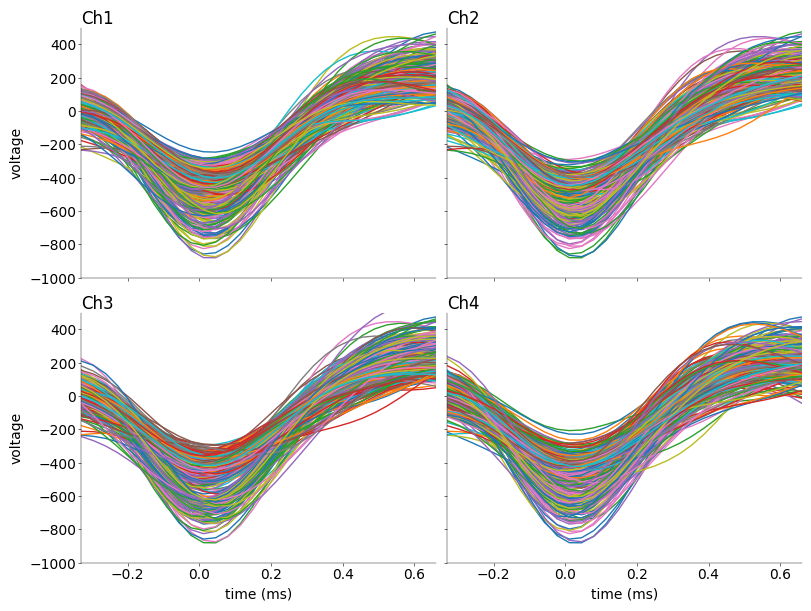

In [43]:
mosaic = [
    ["Ch1", "Ch2"],
    ["Ch3", "Ch4"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 6), layout="constrained", dpi=100
)

# -------------------------------------
# plot the largest 100 spikes (0.5 pts)
# -------------------------------------


# cols = ["Ch1", "Ch2", "Ch3", "Ch4"]
for i, col in enumerate(cols):
    ax[col].set_ylim((-1000, 500))
    ax[col].set_xlim((-0.33, 0.66))
    ax[col].set_title(col, loc="left")
    if col == "Ch3" or col == "Ch4":
        ax[col].set_xlabel("time (ms)")
    else:
        ax[col].set_xticklabels([])
    if col == "Ch1" or col == "Ch3":
        ax[col].set_ylabel("voltage")
    else:
        ax[col].set_yticklabels([])

    X = np.linspace(-0.33, 0.66, 30)

    # we need to sort to get largest spike waveforms
    wvf_sort = waves[np.argsort(waves[:, 10, i])]  # index = 10
    for j in range(100):              #100 largest
        ax[col].plot(X, wvf_sort[j])

## Task 4: Extract features using PCA
Compute the first three PCA features on each channel separately in ```extract_features()``` (2 pts). You can use a available PCA implementation or implement it yourself. After that, each spike is represented by a 12 element vector. Compute the fraction of variance captured by these three PCs.
Plot scatter plots for all pairwise combinations of 1st PCs. Do you see clusters visually? 

*Grading: 2+1 pts*


### PCA:
- how to preprocess data?


(https://stats.stackexchange.com/questions/385775/normalizing-vs-scaling-before-pca)

In [ ]:
def extract_features(w: np.ndarray):
    """Extract features for spike sorting from the waveforms w.

    Do PCA on the waveforms of each channel separately,
    then concatenate the first three principal components
    of each channels into one numpy array (b).


    Parameter
    ---------

    w: np.ndarray, (n_spikes, length_window, n_channels)
        Waveforms from Task 3.


    Return
    ------

    b: np.ndarray, (n_spikes, n_feature)


    Notes
    -----

    You can use PCA from sklearn.

    More on PCA
    https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

    """
    # insert your code here



    n_spikes, length_window, n_channels = w.shape

    b = np.zeros((n_spikes, n_channels * 3))

    # Iterate over each channel
    for channel in range(n_channels):
        pca = PCA(n_components=3)
        pca.fit(w[:, :, channel])
        # ---------------------------------------------
        # Obtain first 3 principle components (2 pts)
        # ---------------------------------------------

        b[:, channel * 3 : (channel + 1) * 3] = pca.transform(w[:, :, channel])

        # -----------------------------------------------------
        # Print the fraction of variance explained (1 pt)
        # -----------------------------------------------------
        print(
            f"Channel {channel + 1} variance explained by first three PCs:",
            pca.explained_variance_ratio_,
        )

    return b

NameError: name 'extract_features' is not defined

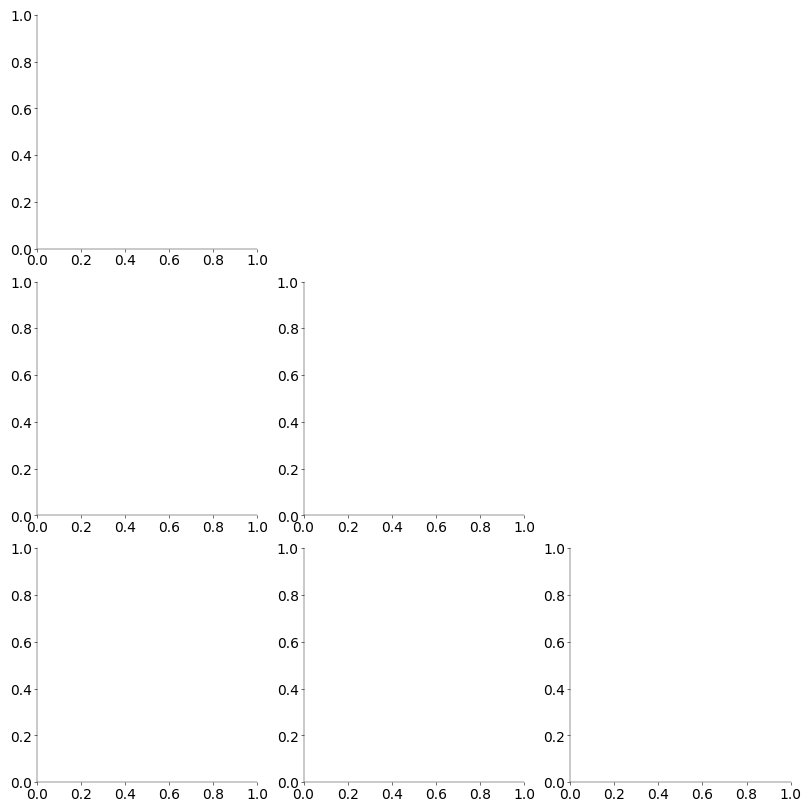

In [44]:
mosaic = [
    ["Ch2 vs Ch1", ".", "."],
    ["Ch3 vs Ch1", "Ch3 vs Ch2", "."],
    ["Ch4 vs Ch1", "Ch4 vs Ch2", "Ch4 vs Ch3"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 8), layout="constrained", dpi=100
)

# Extract features from waveforms
b = extract_features(waves)

# Indices of the 1st PC in b
i = {"Ch1": 0, "Ch2": 3, "Ch3": 6, "Ch4": 9}

for m in np.ravel(mosaic):
    if m == ".":
        continue
    y, x = m.split(" vs ")

    ax[m].set_xlabel(x)
    ax[m].set_ylabel(y)
    # ax[m].set_xlim((-1500, 1500))
    # ax[m].set_ylim((-1500, 1500))
    ax[m].set_xticks([])
    ax[m].set_yticks([])

    ax[m].scatter(b[:, i[m[:3]]], b[:, i[m[-3:]]])

fig.suptitle("Pairwise 1st PCs", fontsize=20)

In [ ]:
# # save data for the next Coding Lab

# np.save("../data/nds_cl_1_features", b)
# np.save("../data/nds_cl_1_spiketimes_s", s)
# np.save("../data/nds_cl_1_spiketimes_t", t)
# np.save("../data/nds_cl_1_waveforms", w)